In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors
from matplotlib.widgets import Slider, Button, RadioButtons

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

import package_Advanced
from package_Advanced import LeadLag_RT , PID_RT

Step Response

[False, False, False, False, False, False, False, False, False, False]


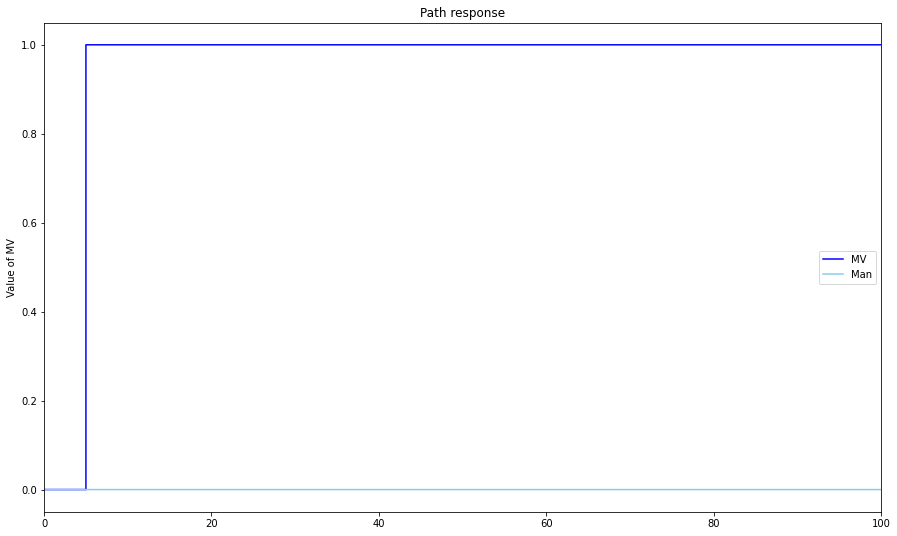

In [2]:
TSim = 100
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV and MVMan
MVPath = {0: 0, 5: 1, 50:1, TSim: 1}
ManPath = {0: False, 5: False, 50: False, 80: False, TSim: False}

t = []
MV = []
Man = []

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    SelectPath_RT(ManPath,t,Man)    
    
plt.figure(figsize = (15,9))

plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,Man,'skyblue',label='Man',where='post')
plt.ylabel('Value of MV')
plt.legend(loc='best')
plt.title('Path response')
plt.xlim([0, TSim])

print(Man[0:10])

Lead Lag

(0.0, 100.0)

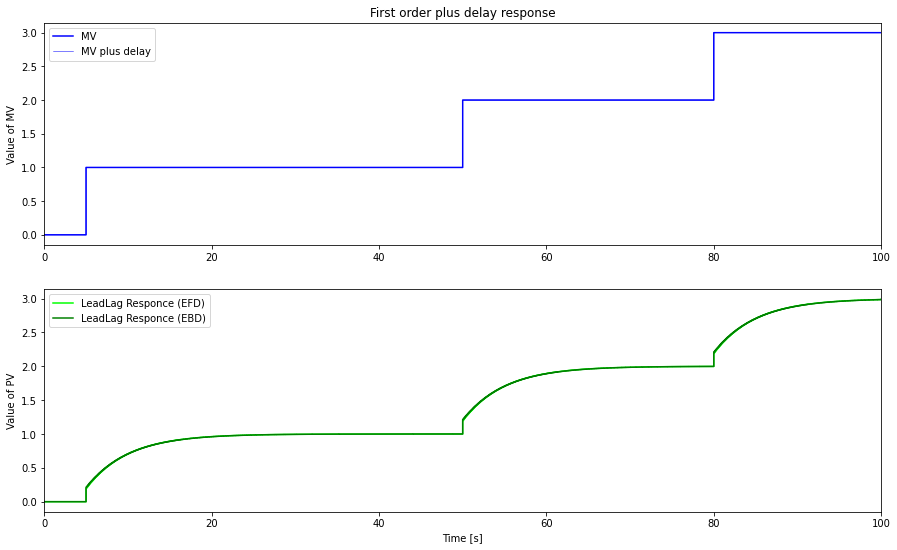

In [3]:
TSim = 100
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}


t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []

# Parameters
Kp = 1
T = 5
theta = 0
TLead = 1
TLag = 5

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay) 
    LeadLag_RT(MV,Kp,TLead,TLag,Ts,PV_EBD,PVInit=0,method='EDB')
    LeadLag_RT(MVDelay,Kp,TLead,TLag,Ts,PV_EFD,PVInit=0,method='EFD')

    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EFD,'lime',label='LeadLag Responce (EFD)',where='post')
plt.step(t,PV_EBD,'g-',label='LeadLag Responce (EBD)',where='post')
#plt.step(t,PV_TRAP,'springgreen',label='LeadLag Responce (TRAP)',where='post')

plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])   

In [9]:
TSim = 100
Ts = 1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}
Path = []
MVMan = {0: False, 5: False, 50: False, 80: False, TSim: False}

t = []
MV = []
MVP = []
MVI = []
MVD = []
MVPID = []
E = []
SP = [0]
PV = []
MVFF = []

MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []

# Parameters
Kc = 5

Ti = 1
Td = 1
MVMin = 0
MVMax = 100
alpha = 3

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    #SelectPath_RT(MVMan,t,MV)
    #LeadLag_RT(MV,Kp,TLead,TLag,Ts,PV_EBD,PVInit=0,method='EDB')
    PID_RT(MV, SP, MV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MVPID, MVP, MVI, MVD, E, ManFF=False, PVInit=0, method='EBD-EBD')
    SP[-1] = MV[-1]
   
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV ,'b-',label='MV',where='post')
#plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('PID Control')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
print(np.shape(MV))
#plt.step(t,MVP,'lime',label='Proportional part (EBD-EBD)',where='post')
#plt.step(t,MVI,'-g',label='Integral part (EBD-EBD)',where='post')
#plt.step(t,MVD,'lime',label='Derivative part (EBD-EBD)',where='post')
plt.step(t,MVPID,'lime',label='PV (EBD-EBD)',where='post')

plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])   